# Zomato Analysis Project

## Project Description

- This project performs **Exploratory Data Analysis (EDA)** on a large Zomato dataset containing **2,11,000+ restaurant records** across multiple Indian cities.
- The dataset includes information such as **restaurant name, city, locality, cuisines, price range, ratings, votes, delivery, table booking, and cost for two**.
- Python libraries **Pandas, NumPy, Matplotlib, Seaborn, and WordCloud** were used for data cleaning, analysis, and visualization.
- Initial steps involved **loading the dataset**, inspecting its structure, data types, and generating descriptive statistics.
- **Duplicate records** were removed to ensure data consistency.
- **Missing values** were handled by filling them with the **mode** of respective columns.
- City-wise and locality-wise analysis was performed to identify areas with the **highest concentration of restaurants**.
- Visualizations were created to analyze:
  - Distribution of restaurant ratings  
  - Top cities and localities with the most restaurants  
  - Most popular cuisines  
  - Relationship between **price range and ratings**  
  - Availability of **online delivery** and **table booking** services  
- Additional analysis identified **top restaurant chains**, **average ratings by city**, and **unique cuisines per city**.
- A **word cloud** was generated to visualize the most common cuisines preferred by customers.
- Overall, the project provides insights into **customer preferences, pricing impact, service availability, and restaurant performance** across India.

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load Dataset
data = pd.read_csv(r"D:\Projects Datasets\Indian-Resturants.csv")
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [4]:
#Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [5]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [6]:
#Clean Data (Remove duplicates)
data = data.drop_duplicates()
data

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,...,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1


In [7]:
#Filling Missing Values
for col in data.columns: 
    data[col].fillna(data[col].mode()[0], inplace=True)

data.isnull().sum()

C:\Users\Jai Kaushik\AppData\Local\Temp\ipykernel_11532\1921897956.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\Jai Kaushik\AppData\Local\Temp\ipykernel_11532\1921897956.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
zipcode                 0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

In [8]:
print(data['city'].unique())
print(data['cuisines'].unique()[:10])

['Agra' 'Ahmedabad' 'Gandhinagar' 'Ajmer' 'Alappuzha' 'Allahabad'
 'Amravati' 'Amritsar' 'Aurangabad' 'Bangalore' 'Bhopal' 'Bhubaneshwar'
 'Chandigarh' 'Mohali' 'Panchkula' 'Zirakpur' 'Nayagaon' 'Chennai'
 'Coimbatore' 'Cuttack' 'Darjeeling' 'Dehradun' 'New Delhi' 'Gurgaon'
 'Noida' 'Faridabad' 'Ghaziabad' 'Greater Noida' 'Dharamshala' 'Gangtok'
 'Goa' 'Gorakhpur' 'Guntur' 'Guwahati' 'Gwalior' 'Haridwar' 'Hyderabad'
 'Secunderabad' 'Indore' 'Jabalpur' 'Jaipur' 'Jalandhar' 'Jammu'
 'Jamnagar' 'Jamshedpur' 'Jhansi' 'Jodhpur' 'Junagadh' 'Kanpur'
 'Kharagpur' 'Kochi' 'Kolhapur' 'Kolkata' 'Howrah' 'Kota' 'Lucknow'
 'Ludhiana' 'Madurai' 'Manali' 'Mangalore' 'Manipal' 'Udupi' 'Meerut'
 'Mumbai' 'Thane' 'Navi Mumbai' 'Mussoorie' 'Mysore' 'Nagpur' 'Nainital'
 'Nasik' 'Nashik' 'Neemrana' 'Ooty' 'Palakkad' 'Patiala' 'Patna'
 'Puducherry' 'Pune' 'Pushkar' 'Raipur' 'Rajkot' 'Ranchi' 'Rishikesh'
 'Salem' 'Shimla' 'Siliguri' 'Srinagar' 'Surat' 'Thrissur' 'Tirupati'
 'Trichy' 'Trivandrum' 'Udaipur' 'V

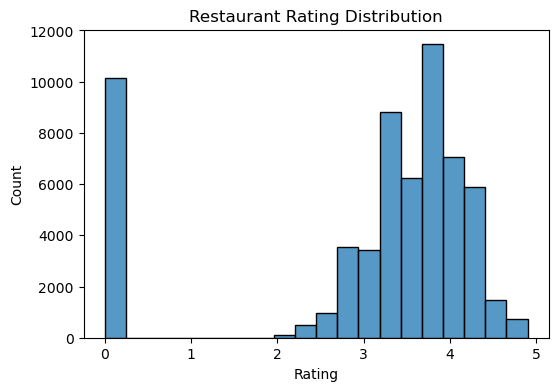

In [9]:
#Rating Distribution
plt.figure(figsize=(6,4))
sns.histplot(data['aggregate_rating'], bins=20)
plt.xlabel("Rating")
plt.title("Restaurant Rating Distribution")
plt.show()

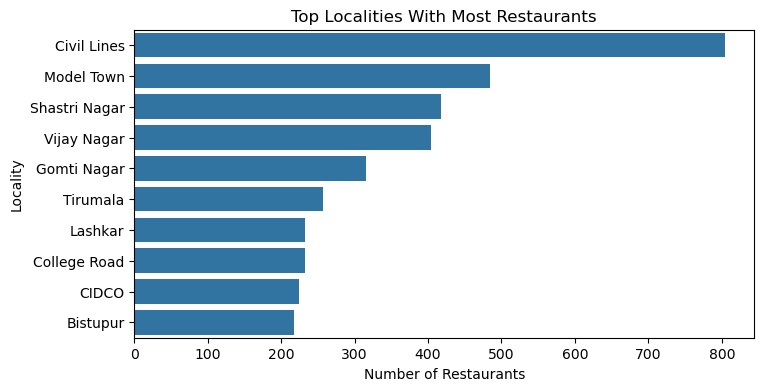

In [10]:
#Top Locations with Most Restaurants
top_localities = data['locality'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_localities.values, y=top_localities.index)
plt.title("Top Localities With Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Locality")
plt.show()

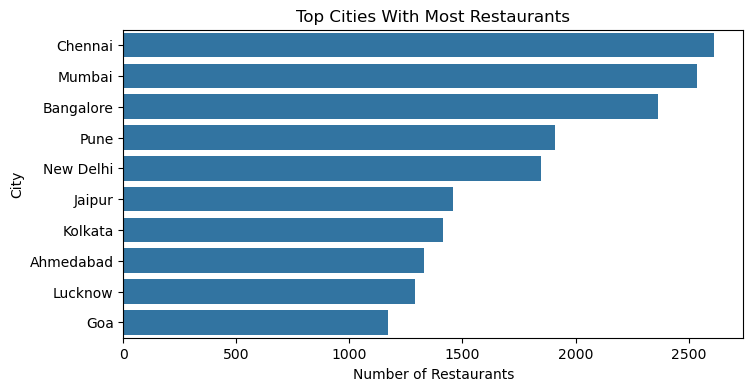

In [11]:
top_cities = data['city'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top Cities With Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

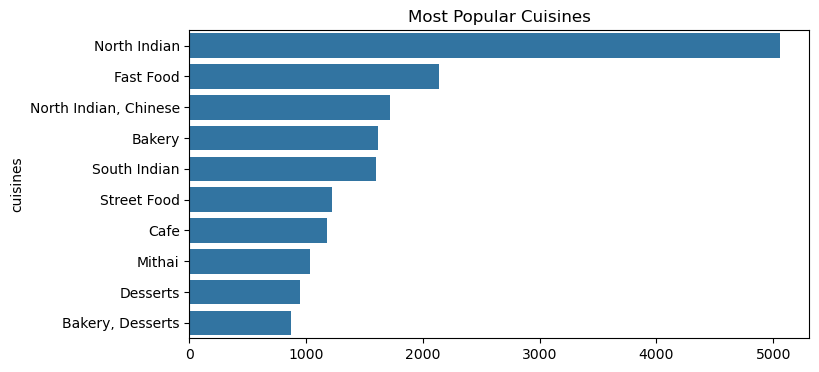

In [12]:
#Most Popular Cuisines
top_cuisines = data['cuisines'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title("Most Popular Cuisines")
plt.show()

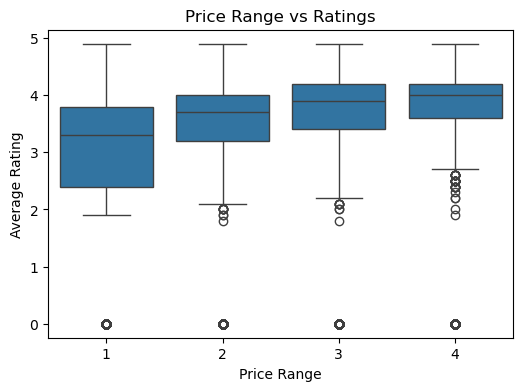

In [13]:
#Price Range vs Ratings
plt.figure(figsize=(6,4))
sns.boxplot(x=data['price_range'], y=data['aggregate_rating'])
plt.title("Price Range vs Ratings")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.show()

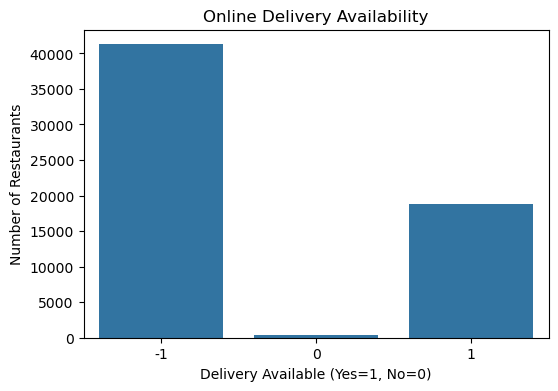

In [14]:
#Online Order & Table Booking Availability
plt.figure(figsize=(6,4))
sns.countplot(x=data['delivery'])
plt.title("Online Delivery Availability")
plt.xlabel("Delivery Available (Yes=1, No=0)")
plt.ylabel("Number of Restaurants")
plt.show()

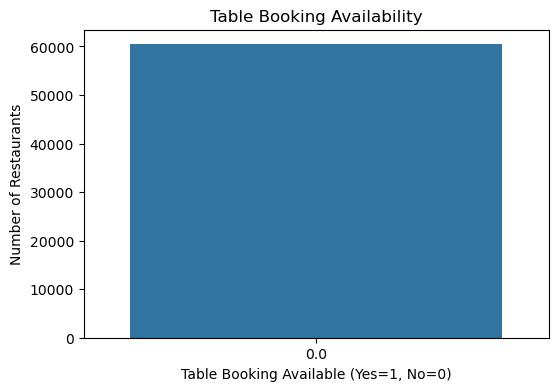

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x=data['opentable_support'])
plt.title("Table Booking Availability")
plt.xlabel("Table Booking Available (Yes=1, No=0)")
plt.ylabel("Number of Restaurants")
plt.show()

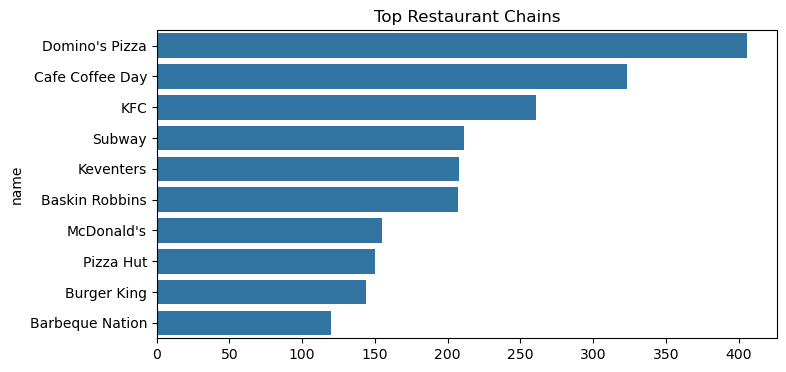

In [16]:
#Top Restaurant Chains
top_chains = data['name'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_chains.values, y=top_chains.index)
plt.title("Top Restaurant Chains")
plt.show()

In [17]:
#Groupby, Apply, Unique
avg_rating_city = data.groupby('city')['aggregate_rating'].mean().sort_values(ascending=False)
avg_rating_city.head()

city
Gurgaon         3.872549
Secunderabad    3.848454
Mumbai          3.795863
Hyderabad       3.775751
New Delhi       3.770005
Name: aggregate_rating, dtype: float64

In [18]:
unique_cuisines = data.groupby('city')['cuisines'].apply(lambda x:
x.unique())
unique_cuisines.head()

city
Agra         [North Indian, South Indian, Mithai, Street Fo...
Ahmedabad    [North Indian, Chinese, Fast Food, Continental...
Ajmer        [Continental, Beverages, South Indian, Fast Fo...
Alappuzha    [South Indian, Kerala, Beverages, Desserts, Fa...
Allahabad    [North Indian, Burger, Fast Food, Bakery, Ital...
Name: cuisines, dtype: object

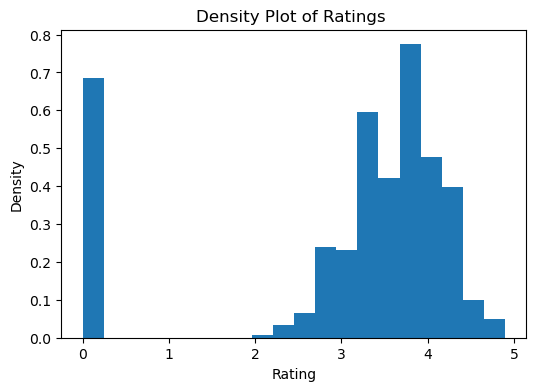

In [19]:
#Density Plot
plt.figure(figsize=(6,4))
plt.hist(data['aggregate_rating'], bins=20, density=True)
plt.xlabel("Rating")
plt.ylabel("Density")
plt.title("Density Plot of Ratings ")
plt.show()

In [20]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


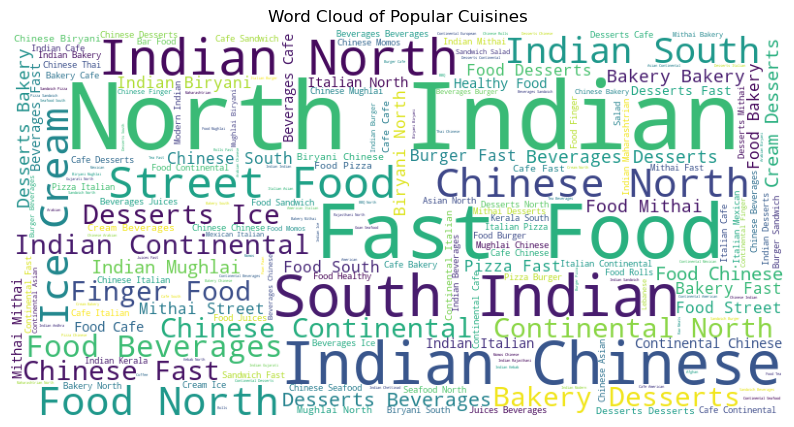

In [21]:
#Word Cloud of Reviews
from wordcloud import WordCloud
text = " ".join(data['cuisines'].astype(str))
wc = WordCloud(width=800, height=400,background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wc)
plt.axis("off")
plt.title("Word Cloud of Popular Cuisines")
plt.show()

## Final Conclusion

- **Metro cities** have the most active and competitive restaurant markets.
- **Online delivery services** are significantly more common than table booking facilities.
- Restaurants offering **multiple cuisines** tend to attract more customers.
- **Moderately priced restaurants** generally receive better ratings compared to very low or very high price ranges.
- Popular national restaurant chains maintain a **strong presence and consistent ratings**.
- Cities like **Gurgaon, Mumbai, Hyderabad, and New Delhi** show higher average restaurant ratings.
- Customer preference is clearly inclined towards **easily accessible, delivery-friendly, and value-for-money restaurants**.
- Overall, the analysis highlights how **pricing, cuisine variety, and service availability** play a key role in restaurant success on Zomato.
